In [1]:
import numpy as np 
import pandas as pd 

In [8]:

data = pd.read_csv("C:/Users/Lenovo/Downloads/archive (6)/Walmart_sales.csv")


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
# Convert temperature to degrees Celsius (℃)
data.Temperature = round((data.Temperature-32)/1.8, 2)

In [13]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [14]:
data = data.drop('Date', axis=1)

# Visualizations

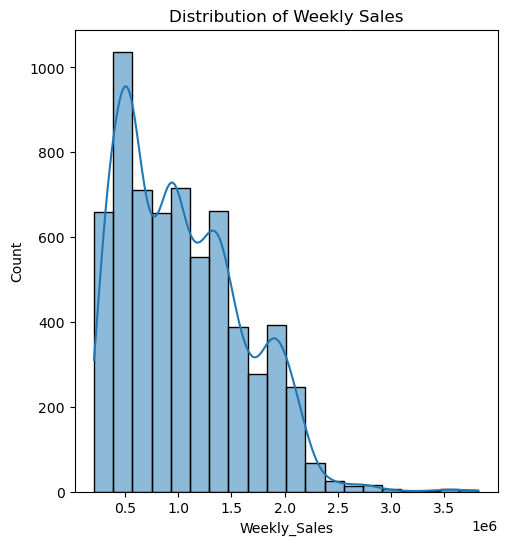

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales');

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


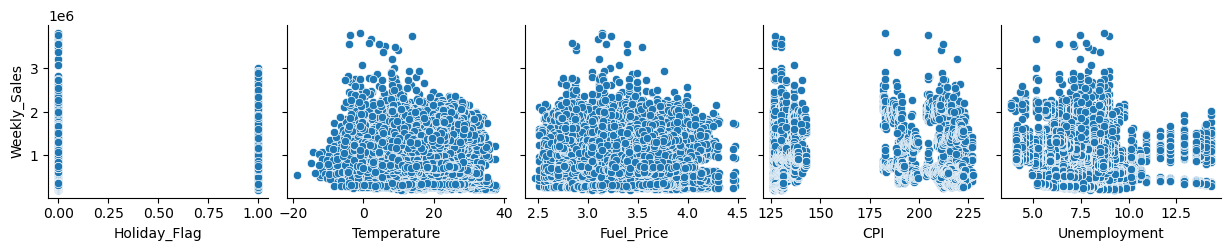

In [17]:
sns.pairplot(data, x_vars=['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
             y_vars=['Weekly_Sales'], kind='scatter')

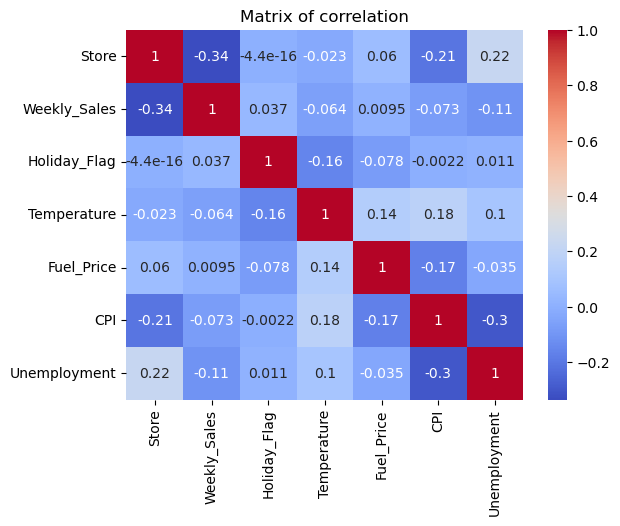

In [18]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix of correlation');

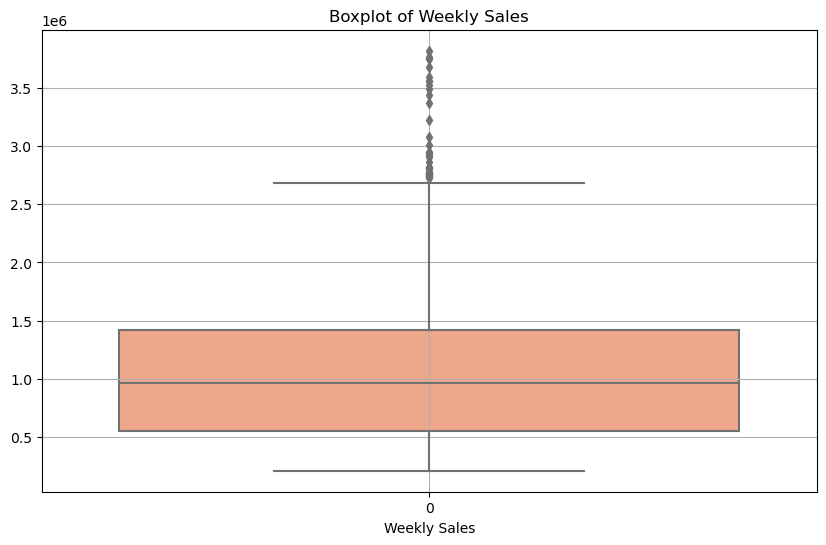

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data['Weekly_Sales'], color='lightsalmon')
plt.title('Boxplot of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.grid(True)

In [32]:
#'''We find the boundaries of emissions. We calculate quartiles (Q1 and Q3) and interquartile range (IQR) 
#for the "Weekly_Sales" column".

Q1 = data['Weekly_Sales'].quantile(0.25) # 25th quartile
Q3 = data['Weekly_Sales'].quantile(0.75) # 75th quartile

IQR = Q3 - Q1      # Interquartile range

lower_bound = Q1 - 1.5 * IQR  # Lower emission limit
upper_bound = Q3 + 1.5 * IQR  # Upper emission limit


In [33]:
#Next, we filter the source data, leaving only those rows where the values of the "Weekly_Sales" column 
#are within certain outlier boundaries.'''

cleaned_data = data[(data['Weekly_Sales'] >= lower_bound) & (data['Weekly_Sales'] <= upper_bound)]

# #Dividing the data into training and test sets

In [34]:
X_cleaned = cleaned_data.drop('Weekly_Sales', axis=1)
y_cleaned = cleaned_data['Weekly_Sales']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, 
                                                                                    test_size=0.1, random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler_cleaned = StandardScaler()
X_train_scaled_cleaned = scaler_cleaned.fit_transform(X_train_cleaned)
X_test_scaled_cleaned = scaler_cleaned.transform(X_test_cleaned)

# 5. Application of the random forest method.

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
forest_model_cleaned = RandomForestRegressor(random_state=101)

In [40]:
forest_model_cleaned.fit(X_train_scaled_cleaned, y_train_cleaned)

RandomForestRegressor(random_state=101)

In [41]:
y_pred_cleaned = forest_model_cleaned.predict(X_test_scaled_cleaned)

# 6. Model evaluation.

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
MAE = mean_absolute_error(y_test_cleaned, y_pred_cleaned)

In [45]:
RMSE = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))

In [46]:
print(MAE)
print(RMSE)
np.mean(data['Weekly_Sales'])

67383.76120249611
117436.66137498885


1046964.8775617715